<a href="https://colab.research.google.com/github/alu0100880755/Logistica/blob/master/TSP_5%20(Recogidas%20y%20entregas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Demandas =  [0, -8, 9, 2, 1, -4]


RUTA

	Distancia total de la ruta =  258.0 kilómetros

	Costos de distancia mínima:

		De 0 a 2 con distancia = 43 Km
		De 1 a 0 con distancia = 46 Km
		De 2 a 5 con distancia = 27 Km
		De 3 a 1 con distancia = 13 Km
		De 4 a 3 con distancia = 54 Km
		De 5 a 4 con distancia = 75 Km

	Orden de la ruta de distancia mínima:

	 0--> 2--> 5--> 4--> 3--> 1--> 0

DATOS DE INTERÉS

	Tiempo Empleado:  209  milisegundos, |  0.21  segundos |  0.0  minutos 
	Iteraciones:  1234
	Nodos:  2

DIBUJO DE LA RUTA


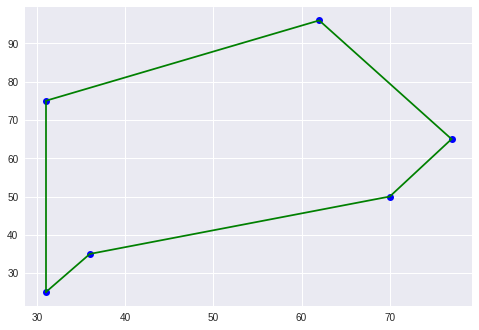

In [2]:
#Instalamos lo necesario
!pip install ortools
from ortools.linear_solver import pywraplp

#Importamos las librerías necesarias
import random
import math
import matplotlib.pyplot as plt
import json

#Declaramos las constantes
nodos = 6
todos = range(nodos)
otros = range(1,nodos)

#Precisión
EPS = 0.001

#Semilla para que empiece por un punto similar siempre y poder comparar con varios modelos
random.seed(8888)

dist= { (i,j) : random.randint(10,100) for i in todos for j in todos }

#Arcos óptimos para el posterior muestreo
dist_final = { }

#####################################################################################
#DIBUJAR LOS RESULTADOS

def dibuja(selected):
    points = [(random.randint(0,100),random.randint(0,100)) for i in todos]

    plt.plot([p[0] for p in points], [p[1] for p in points], 'bo')
    for (i,j) in selected:
        plt.plot([points[i][0],points[j][0]], [points[i][1],points[j][1]], 'g-')


#####################################################################################

#TSP con recogidas y entregas
def TSP_5():
    solver = pywraplp.Solver('TSP', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

    #VARIABLES
    
    # Demandas
    temp = 0; d = []
    for i in otros:
        x = random.randint(-10,10)
        d.append(x)
        temp+=x
    d.append(-temp)
    print("Demandas = ", d)
    
    
    # Carga máxima que puede llevar el camión
    Q = max(d)
    #print(Q)

    
    #Arcos elegidos (Ruta)
    x = {}
    for i in todos:
        for j in todos:
            x[i, j] = solver.BoolVar('x[%i, %i]' % (i, j))
    
    #Numero de bicis que llevamos
    f = {}
    for i in todos:
        for j in todos:
            f[i,j] = solver.IntVar(0.0, solver.infinity(), 'f[%i,%i]'%(i,j))    
    
    #Función objetivo
    solver.Minimize(solver.Sum([dist[i,j]*x[i,j] for i in todos for j in todos if i!=j]))

    
    #Restricciones
    [ solver.Add(  solver.Sum(x[i,j] for j in todos if i!=j) == 1  )  for i in todos ]
    [ solver.Add(  solver.Sum(x[j,i] for j in todos if i!=j) == 1  )  for i in todos ]  
    [ solver.Add(  solver.Sum(f[i,j]-f[j,i] for j in todos ) == d[i] ) for i in otros  ]    
    [ solver.Add(  0 <= f[i,j] <= Q * x[i,j]) for i in todos for j in todos if i!=j ]
    
    #Resolvemos
    sol = solver.Solve()

    print("\n\nRUTA")
    
    if sol == solver.OPTIMAL:
            print('\n\tDistancia total de la ruta = ', solver.Objective().Value(),'kilómetros')

            #DISTANCIAS ENTRE NODOS
            print('\n\tCostos de distancia mínima:\n')
            for i in todos:
                for j in todos:
                    if i!=j and x[i,j].solution_value() > EPS :
                        print('\t\tDe %d a %d con distancia = %d Km'  % (i,j,dist[i,j]))
                        dist_final.update({ (i, j): dist[i,j] })   #Actualizamos el diccionario con las soluciones


            #ORDEN DE LA RUTA
            print('\n\tOrden de la ruta de distancia mínima:\n')
            ruta = '0'; i = 0;

            while i != -1:
                for j in todos:
                    if x[i, j].solution_value() > 0:
                        ruta += '--> ' + str(j)
                        aux = j
                if aux != 0:
                    i = aux
                else:
                    i = -1
            #Mostramos el orden de la ruta
            print("\t", ruta)
            

            #Muestreo del tiempo
            print("\nDATOS DE INTERÉS")

            milisegundos = solver.WallTime()
            segundos = round((milisegundos/1000),2)
            minutos = round((segundos/60),2)
            print("\n\tTiempo Empleado: ", milisegundos, " milisegundos, | ", segundos , " segundos | ", minutos, " minutos ")
            print("\tIteraciones: ", solver.Iterations())
            print("\tNodos: ", solver.nodes())

    else:
            print('\nNo existe solución óptima')

    #DIBUJO DE LA RUTA
    print('\nDIBUJO DE LA RUTA')
    dibuja(dist_final)
    
#Llamamos a la funcion
TSP_5()        